## Exercise solutions


In [1]:
using CSV, DataFrames, Pkg, Plots

### Exercise 1

Create a line plot depicting the `tan` function of a vector x of size 1000 and ranging from 0 to 2π radians. Name the two axis appropriately. The plot should not have a legend.

In [4]:
x = range(0, 2π, length=1000)

0.0:0.006289474781961547:6.283185307179586

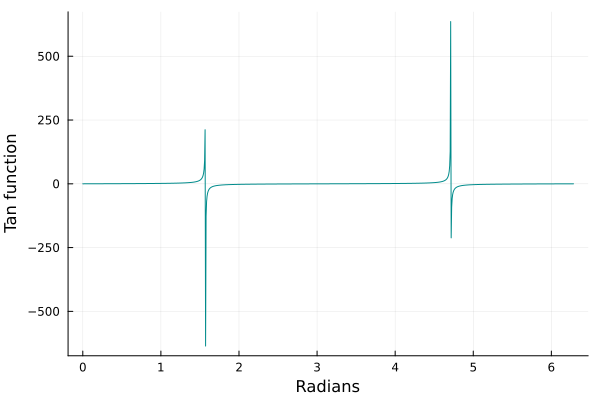

In [5]:
plot(tan, x, linecolor=:cyan4, xlabel="Radians",ylabel="Tan function", labels=false)

### Exercise 2

Load the `sleepstudy`dataset from `RDatasets`.

In [2]:
using RDatasets

In [3]:
sleep = dataset("lme4", "sleepstudy")

Row,Reaction,Days,Subject
,Float64,Int32,Cat…
1,249.56,0,308
2,258.705,1,308
3,250.801,2,308
4,321.44,3,308
5,356.852,4,308
6,414.69,5,308
7,382.204,6,308
8,290.149,7,308
9,430.585,8,308


In [6]:
describe(sleep)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Reaction,298.508,194.332,288.651,466.353,0,Float64
2,Days,4.5,0,4.5,9,0,Int32
3,Subject,,308,,372,0,"CategoricalValue{String, UInt8}"


Fit a linear model using `Reaction`as the response variable and `Day`as the predictor. Add a scatterplot between Days (xaxis) and Reaction (yaxis) and add a regression line with the corresponding annotation. Use the color `coral3` for the dots and `cyan4`for the line. The line should have a width of 3. Name appropriatetely the x and the y axis. Use a transparency of 0.5 for the dots.

In [7]:
using StatsPlots, GLM, DataFrames

In [8]:
mod = lm(@formula(Reaction ~ Days), sleep)
mod
#plot(mod)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Reaction ~ 1 + Days

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  251.405      6.61015  38.03    <1e-86  238.361     264.449
Days          10.4673     1.2382    8.45    <1e-14    8.02386    12.9107
────────────────────────────────────────────────────────────────────────

In [9]:
pred = DataFrame(Days=0:9)

Row,Days
,Int64
1,0
2,1
3,2
4,3
5,4
6,5
7,6
8,7
9,8


In [10]:
pr = predict(mod, pred, interval = :prediction, level = 0.95)

Row,prediction,lower,upper
,Float64?,Float64?,Float64?
1,251.405,156.347,346.464
2,261.872,167.065,356.679
3,272.34,177.722,366.958
4,282.807,188.315,377.299
5,293.274,198.846,387.703
6,303.742,209.313,398.17
7,314.209,219.717,408.7
8,324.676,230.058,419.294
9,335.143,240.336,429.95


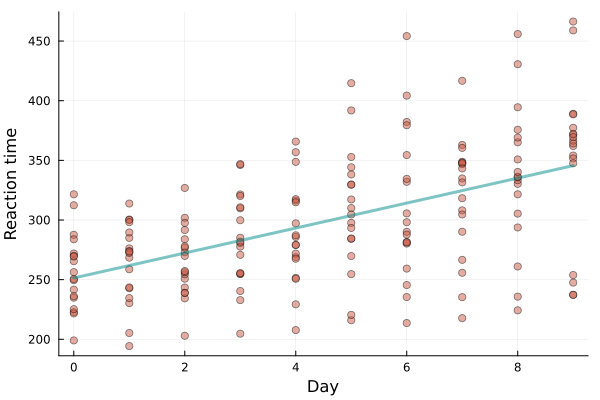

In [11]:
plot(sleep.Days, sleep.Reaction, seriestype=:scatter, color=:coral3,
        xlabel="Day", ylabel="Reaction time", smooth=true,linecolor=:cyan4,
        linewidth=3, alpha=0.5, label=false)

In [12]:
#Pkg.add("LaTeXStrings")
using LaTeXStrings

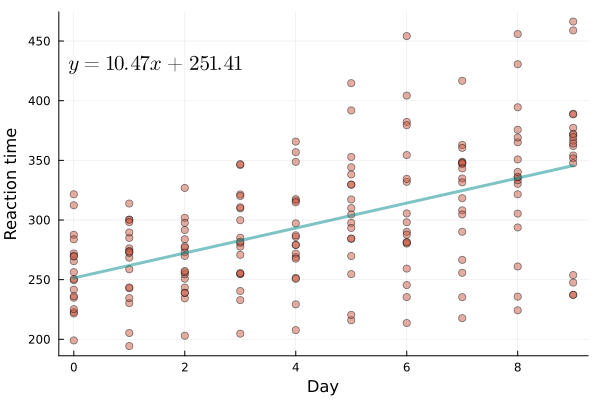

In [13]:
annotate!(1.5,430,
  latexstring(
    "y = $(round(coef(mod)[2], digits = 2))x + $(round(coef(mod)[1], digits = 2))"
  )
)


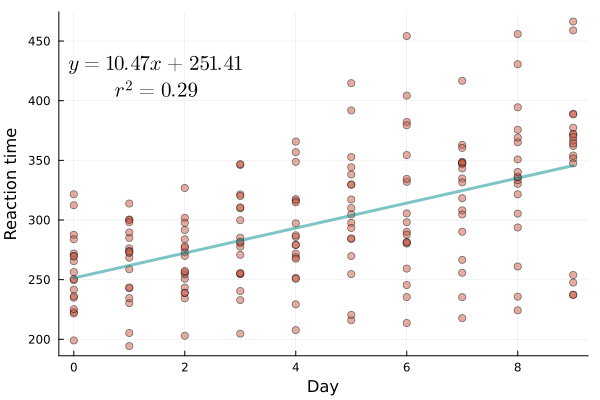

In [14]:
annotate!(
  1.5,
  410,
  latexstring("r^2 = $(round(r2(mod), digits = 2))")
)

Bonus question. Make the same plot as above adding 95% confidence intervals.

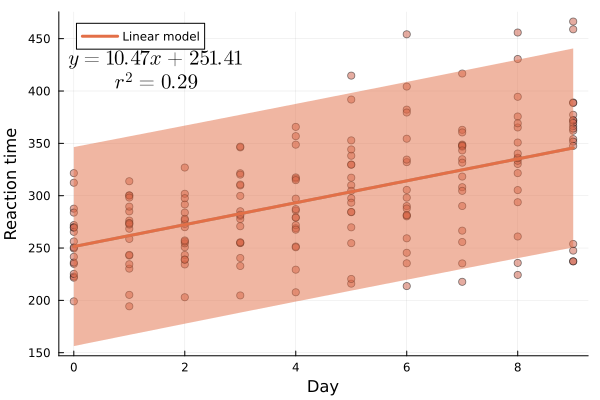

In [15]:
plot!(pred.Days, pr.prediction, linewidth=3, label="Linear model",
        ribbon = (pr.prediction .- pr.lower, pr.upper .- pr.prediction))

### Exercise 3

Load the `tilapia_pheno.txt`dataset.
 

In [16]:
pheno = DataFrame(CSV.File("tilapia_pheno.txt", delim=";"))

Row,Animal_Id,Location,Line,Weight_initial,Weight_final,Length_initial,Length_final
,Int64,String15,String15,Float64,Float64,Float64,Float64
1,10977965,Kunduchi,Wami,84.3,201.5,14.2,18.0
2,10978207,Kunduchi,Wami,67.8,0.0,13.4,0.0
3,10978378,Kunduchi,Wami,103.94,225.9,14.4,18.5
4,10978460,Kunduchi,Wami,84.85,239.2,14.5,19.9
5,10977732,Kunduchi,Wami,78.29,195.6,14.0,19.0
6,10978532,Kunduchi,Wami,89.93,220.0,14.7,19.0
7,10978612,Kunduchi,Wami,117.83,270.9,15.0,20.0
8,10977963,Kunduchi,Wami,92.48,209.4,14.9,18.3
9,10977682,Kunduchi,Wami,95.54,178.8,14.9,17.7


Created a grouped histogram of the two locations for final weight.

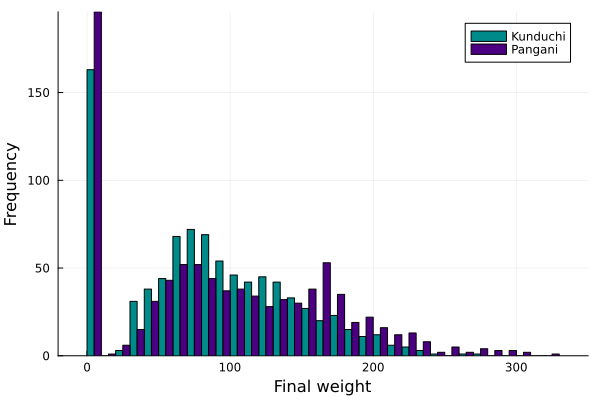

In [17]:
grp_hist = groupedhist(pheno.Weight_final, group=pheno.Location, color=[:cyan4 :indigo],
            xlabel="Final weight", ylabel="Frequency", bins=30)

Create a boxplot for final length for all different lines of the two locations. 


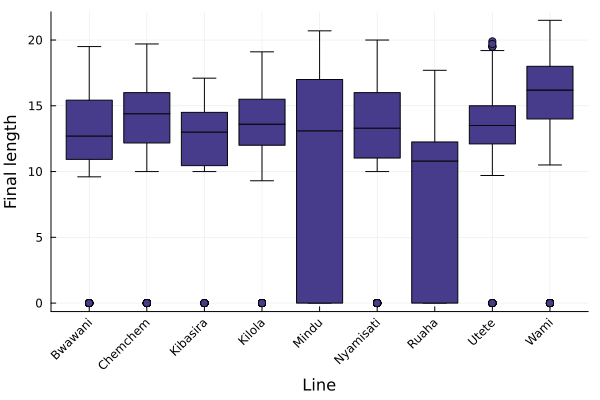

In [19]:
bx = @df pheno boxplot(:Line, :Length_final,label=false,color=:slateblue4,
                xlabel="Line", ylabel="Final length",
                xrotation=45, bottommargin=5Plots.mm)

Estimate a correlation matrix for all numeric variables. Plot a heat map.


In [20]:
using Statistics

In [21]:
cor_mat = cor(Matrix(select(pheno, names(pheno,Float64))))

4×4 Matrix{Float64}:
 1.0       0.514052  0.957177  0.312355
 0.514052  1.0       0.523587  0.886276
 0.957177  0.523587  1.0       0.329928
 0.312355  0.886276  0.329928  1.0

In [22]:
names(pheno,Float64)

4-element Vector{String}:
 "Weight_initial"
 "Weight_final"
 "Length_initial"
 "Length_final"

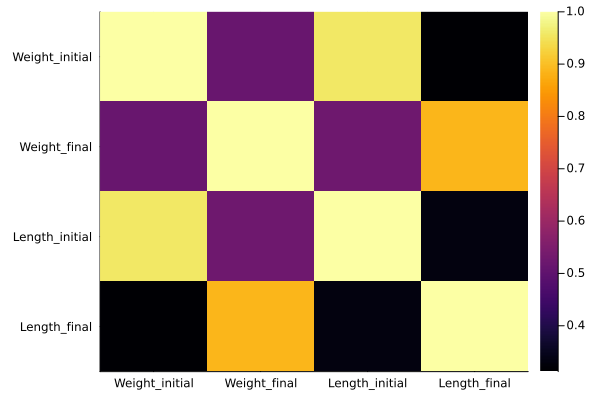

In [23]:
hm = plot(heatmap(names(pheno,Float64),
                names(pheno,Float64),
                cor_mat, yflip=true))

Change the layout to `ggplot2`. Create a figure containing all the previous plots.

In [24]:
theme(:ggplot2)

In [25]:
layout = @layout [a b; c]

2×1 Matrix{Any}:
 Any[(label = :a, blank = false) (label = :b, blank = false)]
 (label = :c, blank = false)

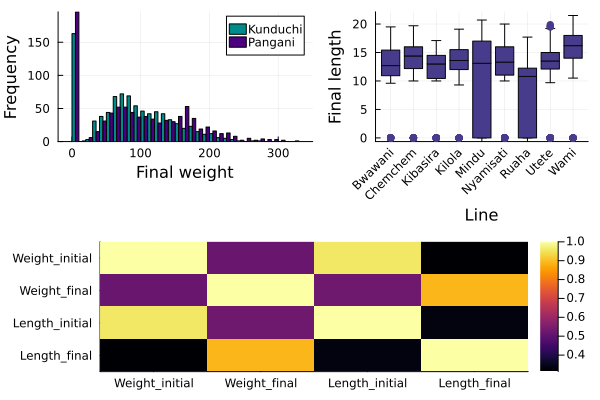

In [26]:
plot(grp_hist, bx, hm; layout=layout)